# Hourly Electricity Demand Data Heatmap by Week

In [23]:
import pandas as pd
import numpy as np
import import_funcs
#reload(import_funcs)
import matplotlib.pyplot as plt
import plotly.plotly as py
from plotly.graph_objs import *

In [2]:
# Import the BGE hourly electricity data and weather data using import_funcs.py class
old_apt = import_funcs.BGEdata("old apt")
new_apt = import_funcs.BGEdata("new apt")
weather = import_funcs.weather()

# Merge into one Pandas dataframe
old_apt_and_weather = pd.merge(weather,old_apt,left_index=True,right_index=True)
new_apt_and_weather = pd.merge(weather,new_apt,left_index=True,right_index=True)
#new_apt_and_weather = new_apt

new_apt.head()

COST  NOTES            TYPE UNITS  USAGE  \
timestamp                                                      
2014-05-24 00:00:00  NaN    NaN  Electric usage   kWh   0.04   
2014-05-24 01:00:00  NaN    NaN  Electric usage   kWh   0.07   
2014-05-24 02:00:00  NaN    NaN  Electric usage   kWh   0.04   
2014-05-24 03:00:00  NaN    NaN  Electric usage   kWh   0.04   
2014-05-24 04:00:00  NaN    NaN  Electric usage   kWh   0.05   

                          timestamp_end  
timestamp                                
2014-05-24 00:00:00 2014-05-24 00:59:00  
2014-05-24 01:00:00 2014-05-24 01:59:00  
2014-05-24 02:00:00 2014-05-24 02:59:00  
2014-05-24 03:00:00 2014-05-24 03:59:00  
2014-05-24 04:00:00 2014-05-24 04:59:00

In [55]:
array = pd.DataFrame(np.zeros([len(new_apt['USAGE'].resample('d',how='sum')),24]),index=new_apt['USAGE'].resample('d',how='sum').index)

for i in range(0,24):
    array[i] = np.array(new_apt['USAGE'][new_apt.index.hour==i])

array.sort_index(ascending=True, inplace=True)
array.head()

0     1     2     3     4     5     6     7     8     9   ...   \
timestamp                                                               ...    
2014-05-24  0.04  0.07  0.04  0.04  0.05  0.06  0.04  0.04  0.45  0.06  ...    
2014-05-25  0.09  0.07  0.42  0.07  0.09  0.07  0.13  0.31  0.39  0.47  ...    
2014-05-26  0.15  0.13  0.12  0.14  0.13  0.71  3.13  0.84  1.10  1.94  ...    
2014-05-27  0.08  0.08  0.08  0.08  0.08  0.09  1.04  1.29  0.23  0.09  ...    
2014-05-28  1.53  1.44  1.29  0.52  0.10  0.12  2.43  0.10  0.50  0.08  ...    

              14    15    16    17    18    19    20    21    22    23  
timestamp                                                               
2014-05-24  0.27  0.46  0.21  0.13  1.48  0.05  0.47  0.05  0.36  0.07  
2014-05-25  0.11  0.12  0.37  2.79  2.52  3.44  2.60  2.15  0.34  0.13  
2014-05-26  0.20  0.28  0.13  0.10  0.46  0.09  0.26  0.34  0.10  0.08  
2014-05-27  0.09  0.09  2.18  3.34  3.44  5.36  1.60  1.89  2.18  1.69  
2014-05-28  0.45  0.09  0.08  0.09  0.38  2.10  2.20  2.69  0.38  0.11  

[5 rows x 24 columns]

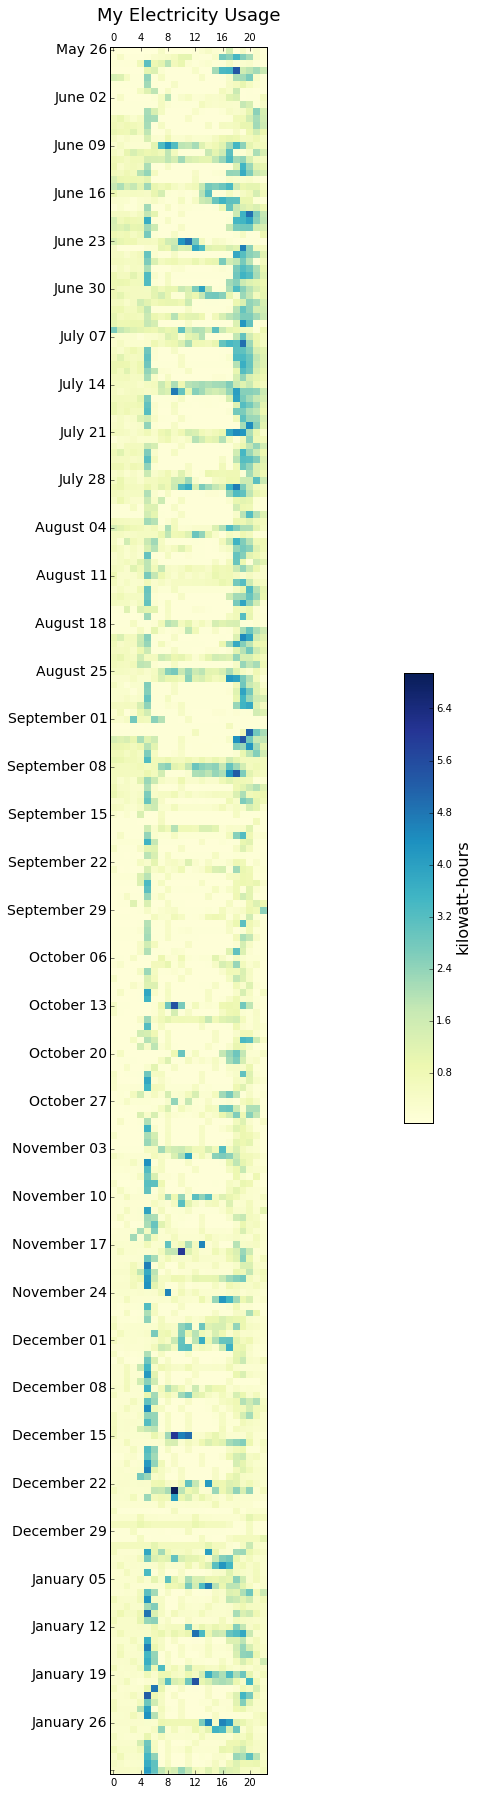

In [21]:
import matplotlib.dates as mdates

#sundays = pd.Series(array[array.index.dayofweek==0].index)

fig, ax = plt.subplots(figsize=[10,25])
title('My Electricity Usage \n', fontsize=18)
plt.imshow(array, interpolation='none', cmap='YlGnBu')
plt.tick_params(axis="both", which="both", bottom="on", top="on",
                labelbottom="on", labeltop='on', left="on", right="off", labelleft="on") 
colorbar_ax = fig.add_axes([0.8, .375, .04, .25])
cb = plt.colorbar(cax = colorbar_ax)
cb.set_label('kilowatt-hours',fontsize = 16)

xticks = range(0,24,4)
yticks = range(0,len(array),7)

ax.set_xticks(xticks)
ax.set_yticks(yticks)
ax.set_yticklabels(sundays.apply(lambda x: x.strftime('%B %d')), fontsize=14)
ax.yaxis_date()

#ax.yaxis.set_major_formatter(mdates.DateFormatter('%Y')) This didn't work for me

plt.tight_layout()
plt.show()

#fig.savefig('my_usage_heatmap.png', bbox_inches='tight')


In [59]:
data = Data([
    Heatmap(
        x = range(0,24,1),
        y = array.index,
        z = np.array(array),
        colorscale='YIGnBu',
        reversescale=True)
])
layout = Layout(
    title='YIGnBu',
    yaxis = YAxis(autorange='reversed')
)
plot_url = py.plot(data, filename='YIGnBu-heatmap')
#fig = Figure(data=data, layout=layout)
#plot_url = py.plot(fig, filename='YIGnBu-heatmap')